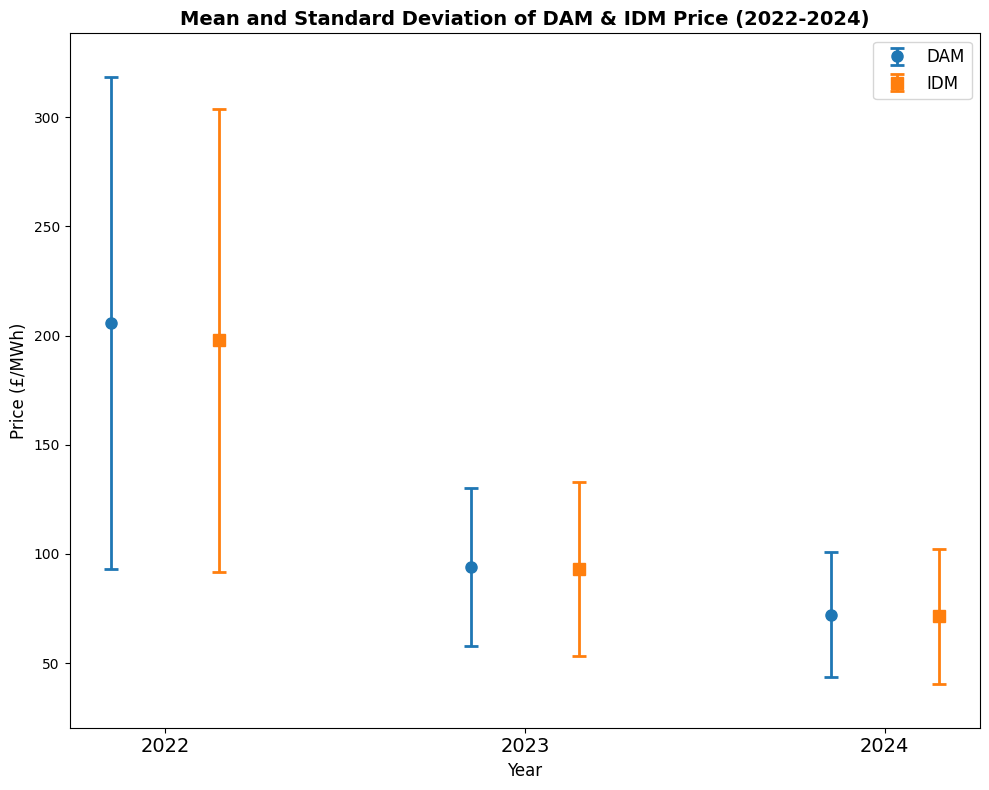

Mean and Standard Deviation of DAM & IDM Price (2022-2024)
   Year  DAM_Mean  DAM_Std  IDM_Mean  IDM_Std
0  2022    205.69   112.73    197.85   106.09
1  2023     94.02    36.13     92.99    39.74
2  2024     72.26    28.69     71.39    30.98

Key Insights:
------------------------------
2022:
  DAM: 205.7 ± 112.7 £/MWh
  IDM: 197.8 ± 106.1 £/MWh
  IDM Premium: -7.8 £/MWh (-3.8%)
  Volatility Ratio (IDM/DAM): 0.94
2023:
  DAM: 94.0 ± 36.1 £/MWh
  IDM: 93.0 ± 39.7 £/MWh
  IDM Premium: -1.0 £/MWh (-1.1%)
  Volatility Ratio (IDM/DAM): 1.10
2024:
  DAM: 72.3 ± 28.7 £/MWh
  IDM: 71.4 ± 31.0 £/MWh
  IDM Premium: -0.9 £/MWh (-1.2%)
  Volatility Ratio (IDM/DAM): 1.08


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read DAM and IDM price data from the cleaned market price CSV folder 
price_files = {
    2022: '/Users/haixiaosun/Library/Mobile Documents/com~apple~CloudDocs/Coding Work/Markowitz exploration/Cleaned market prices/DAM & IDM/2022 DAM IDM Price.csv',
    2023: '/Users/haixiaosun/Library/Mobile Documents/com~apple~CloudDocs/Coding Work/Markowitz exploration/Cleaned market prices/DAM & IDM/2023 DAM IDM Price.csv',
    2024: '/Users/haixiaosun/Library/Mobile Documents/com~apple~CloudDocs/Coding Work/Markowitz exploration/Cleaned market prices/DAM & IDM/2024 DAM IDM Price.csv'
}

# Load data and calculate statistics
stats_data = []

for year in [2022, 2023, 2024]:
    # Load the combined DAM and IDM data
    df = pd.read_csv(price_files[year])
    
    # Extract DAM prices (column 1) and IDM prices (column 2)
    dam_prices = df.iloc[:, 1].values  # Second column (DAM price)
    idm_prices = df.iloc[:, 2].values  # Third column (IDM price)
    
    # Remove NaN values
    dam_prices = dam_prices[~np.isnan(dam_prices)]
    idm_prices = idm_prices[~np.isnan(idm_prices)]
    
    # Calculate statistics
    stats_data.append({
        'Year': year,
        'DAM_Mean': np.mean(dam_prices),
        'DAM_Std': np.std(dam_prices),
        'IDM_Mean': np.mean(idm_prices),
        'IDM_Std': np.std(idm_prices)
    })

# Convert to DataFrame
stats_df = pd.DataFrame(stats_data)

# Create error bar plot
fig, ax = plt.subplots(figsize=(10, 8))

# Colors
dam_color = '#1f77b4'  # Blue
idm_color = '#ff7f0e'  # Orange

# X positions for each year
years = stats_df['Year'].values
x_dam = years - 0.15  # Offset DAM slightly left
x_idm = years + 0.15  # Offset IDM slightly right

# Create error bars
ax.errorbar(x_dam, stats_df['DAM_Mean'], yerr=stats_df['DAM_Std'], 
           fmt='o', color=dam_color, capsize=5, capthick=2, 
           markersize=8, linewidth=2, label='DAM')

ax.errorbar(x_idm, stats_df['IDM_Mean'], yerr=stats_df['IDM_Std'], 
           fmt='s', color=idm_color, capsize=5, capthick=2, 
           markersize=8, linewidth=2, label='IDM')

# Customize the plot
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Price (£/MWh)', fontsize=12)
ax.set_title('Mean and Standard Deviation of DAM & IDM Price (2022-2024)', fontsize=14, fontweight='bold')
ax.set_xticks(years)
ax.set_xticklabels(years)
ax.legend(fontsize=12)

ax.set_xticks(years)
ax.set_xticklabels(years)
ax.tick_params(axis='x', labelsize=14)  # Increase x-axis label size
ax.legend(fontsize=12)

# Add some padding to y-axis - FIXED VERSION
y_min = min((stats_df['DAM_Mean'] - stats_df['DAM_Std']).min(), 
            (stats_df['IDM_Mean'] - stats_df['IDM_Std']).min()) - 20
y_max = max((stats_df['DAM_Mean'] + stats_df['DAM_Std']).max(), 
            (stats_df['IDM_Mean'] + stats_df['IDM_Std']).max()) + 20
ax.set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()

# Print summary statistics
print("Mean and Standard Deviation of DAM & IDM Price (2022-2024)")
print("=" * 50)
print(stats_df.round(2))

print("\nKey Insights:")
print("-" * 30)
for i, row in stats_df.iterrows():
    year = int(row['Year'])
    dam_mean = row['DAM_Mean']
    idm_mean = row['IDM_Mean']
    dam_std = row['DAM_Std']
    idm_std = row['IDM_Std']
    
    premium = idm_mean - dam_mean
    premium_pct = (premium / dam_mean) * 100
    
    print(f"{year}:")
    print(f"  DAM: {dam_mean:.1f} ± {dam_std:.1f} £/MWh")
    print(f"  IDM: {idm_mean:.1f} ± {idm_std:.1f} £/MWh")
    print(f"  IDM Premium: {premium:+.1f} £/MWh ({premium_pct:+.1f}%)")
    print(f"  Volatility Ratio (IDM/DAM): {idm_std/dam_std:.2f}")

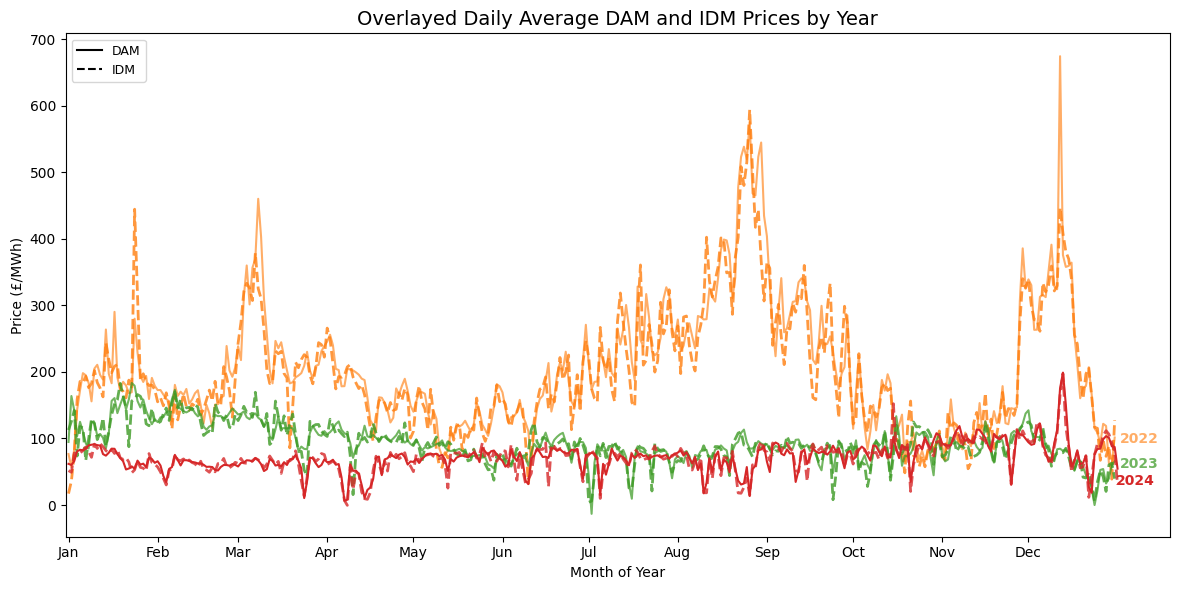

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load DAM and IDM price data for overlay plot
years = [2022, 2023, 2024]
price_data = {}

for year in years:
    file_path = f'../Cleaned market prices/DAM & IDM/{year} DAM IDM Price.csv'
    
    df = pd.read_csv(file_path)
    df['datetime'] = pd.to_datetime(df.iloc[:, 0], format='%d/%m/%Y %H:%M')
    df['dam_price'] = df['DAM price']
    df['idm_price'] = df['IDM price']
    df = df[df['datetime'].dt.minute == 0]  # Hourly data only
    df = df.dropna(subset=['dam_price', 'idm_price'])
    df['day_of_year'] = df['datetime'].dt.dayofyear
    price_data[year] = df

# Define colors for each year
colors = ["#ff7e0ea1", "#3c9a24b8", '#d62728']  # Orange, Green, Red for 2022, 2023, 2024
years = [2022, 2023, 2024]

# Create the overlay plot with both DAM and IDM prices
plt.figure(figsize=(11.9, 6))

for i, year in enumerate(years):
    df = price_data[year]
    
    # Group by day of year and take mean to get daily averages
    daily_dam_avg = df.groupby('day_of_year')['dam_price'].mean()
    daily_idm_avg = df.groupby('day_of_year')['idm_price'].mean()
    
    # Plot DAM prices (solid lines)
    plt.plot(daily_dam_avg.index, daily_dam_avg.values, 
             color=colors[i], linewidth=1.5, linestyle='-', 
             label=f'{year} DAM')
    
    # Plot IDM prices (dashed lines, same color but slightly different alpha)
    plt.plot(daily_idm_avg.index, daily_idm_avg.values, 
             color=colors[i], linewidth=2, linestyle='--', alpha=0.8,
             label=f'{year} IDM')
    
    # Add year annotation only once per color (using DAM line position)
    last_x_dam = daily_dam_avg.index[-1]
    last_y_dam = daily_dam_avg.values[-1]
    
    # Position year labels based on year
    if year == 2024:
        plt.annotate(str(year), xy=(last_x_dam, last_y_dam), xytext=(-1, -12),
                    textcoords='offset points', fontsize=10, fontweight='bold',
                    color=colors[i])
    elif year == 2023:
        plt.annotate(str(year), xy=(last_x_dam, last_y_dam), xytext=(4, -5),
                    textcoords='offset points', fontsize=10, fontweight='bold',
                    color=colors[i])
    elif year == 2022:
        plt.annotate(str(year), xy=(last_x_dam, last_y_dam), xytext=(4, -4),
                    textcoords='offset points', fontsize=10, fontweight='bold',
                    color=colors[i])

plt.ylabel('Price (£/MWh)')
plt.xlabel('Month of Year')
plt.xlim(0,)
plt.title('Overlayed Daily Average DAM and IDM Prices by Year', fontsize=14)

# Set x-axis to show months instead of days
month_starts = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(month_starts, month_labels)

# Add legend to explain line styles
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='black', linewidth=1.5, linestyle='-', label='DAM'),
                   Line2D([0], [0], color='black', linewidth=1.5, linestyle='--', label='IDM')]
plt.legend(handles=legend_elements, loc='upper left', fontsize=9)


plt.tight_layout()
plt.show()